In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

: 

In [3]:
mask = 'maskfile/wm4_40.bmp'

Image.MAX_IMAGE_PIXELS = 2000000000

pic = Image.open(mask)
pix = np.array(pic)

pix = pix.reshape(-1,320,512)
dim = np.shape(pix)_split

upload_rows = np.empty((1,dim[2]),dtype=bool) ##New mask

num_row = 0
num_row_list = np.zeros(dim[0], dtype=int) ## New number of rows


for i in range(dim[0]-1, -1 ,-1):
    print("processing subframe: {}".format(i), end="\r")
    for j in range(dim[1]-1, -1, -1):
        if(i>0):
            if(not((pix[i-1,j] == pix[i,j]).all())): ## if row changes, upload
                upload_rows = np.append(upload_rows, [pix[i,j]],axis=0)
                rowadd = bin(319-j).split('b')[1].zfill(9)
                rowadd = list(map(int, rowadd))
                upload_rows[-1,320:329] = rowadd ## add row with address
                num_row += 1
        else:  ## last subframe, upload all rows
            upload_rows = np.append(upload_rows, [pix[i,j]],axis=0)
            rowadd = bin(319-j).split('b')[1].zfill(9)
            rowadd = list(map(int, rowadd))
            upload_rows[-1,320:329] = rowadd
            num_row += 1
    while(num_row < 2): ## Ensure at least 2 rows per subframe for verilog constraint
        num_row = num_row + 1
        upload_rows = np.append(upload_rows, [pix[i,-1]],axis=0)
        rowadd = bin(0).split('b')[1].zfill(9)
        rowadd = list(map(int, rowadd))
        upload_rows[-1,320:329] = rowadd
    num_row_list[-1-i] = (num_row)
    num_row = 0

if(sum(num_row_list) % 16 != 0): ## Mask size requires rows to be multiple of 16
    num_row = 16 - (sum(num_row_list) % 16)
    num_row_list[0] = num_row_list[0] + num_row
    upload_rows = np.insert(upload_rows, 1, [[True]*dim[2]]*(num_row), axis=0)
    num_row = 0


upload_rows = upload_rows[1:]
upload_rows = upload_rows[::-1,:]

maskfilename = 'maskfile/t6_merge_wm44.bmp'
img = Image.fromarray(upload_rows)
img = img.convert('1')
img.save(maskfilename)

In [ ]:
mask = './t6_cats_256.bmp'

pic = Image.open(mask)
pix = np.array(pic)
print(pix.shape)
pix = pix.reshape(-1,320,512)

: 

In [3]:
print(pix[0,0,0])
pix[0,0,0] = True
print(pix[0,0,0])

False
True


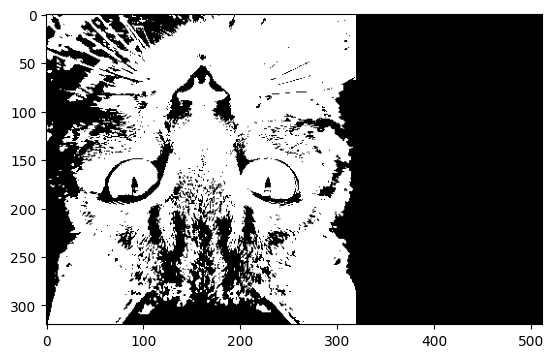

In [4]:
binary_array = pix[200].astype(int)
inverted_array = 1 - binary_array
plt.imshow(inverted_array, cmap='binary')
plt.show()


In [2]:
x = 0
y = 0

subframe_count = 80
width = 320
overlap = 0
height = 8

pix = np.zeros((subframe_count,320,512), dtype=bool)


# for i in range(6400):
#     print("pre processing subframe: {}".format(i), end="\r")
#     for j in range(320):
#         for k in range(512):
#             pix[i][j][k] = False

for i in range(subframe_count):
    print("processing subframe: {}".format(i), end="\r")
    for a in range(x*width, x*width+width+overlap):
        for b in range(y*height, y*height+height):
            pix[i][b][a] = True

    if x == 320/width-1:
        x = 0
        y += 1
    else:
        x += 1

    if y == 40:
        y = 0

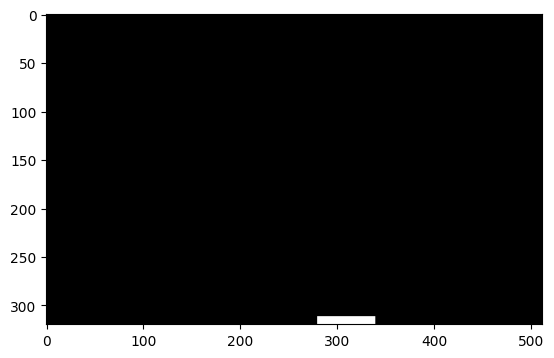

In [3]:
binary_array = pix[639].astype(int)
inverted_array = 1 - binary_array
plt.imshow(inverted_array, cmap='binary')
plt.show()

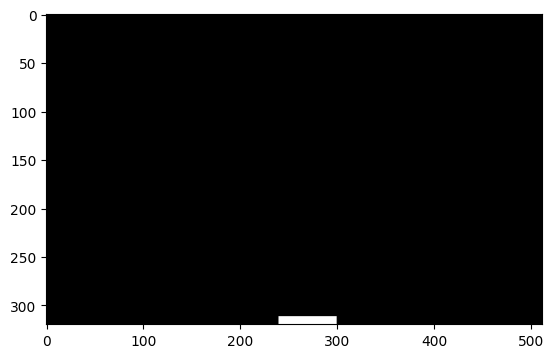

In [4]:
binary_array = pix[638].astype(int)
inverted_array = 1 - binary_array
plt.imshow(inverted_array, cmap='binary')
plt.show()

In [5]:
pix = pix.reshape(-1, 512)
img = Image.fromarray(pix)
img = img.convert('1')
img.save('maskfile/wm4_40_ol.bmp')